# HW1: Classification on simple datasets
## Goal: 
1. get familiar with the machine learning processes.
2. understand the applications of KNN, SVM, and Logistic Regression.


## Datasets:
Two famous ML datasets:
- Iris dataset
 - The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant(Setosa(0), Versicolor(1),  Virginica(2)). 
 - each data instance contains 
    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm
- The Street View House Numbers (SVHN) Dataset
 - a colorful handwritten digits database collected from house numbers in Google Street View images, containing 73257 digits for training, 26032 digits for testing, and 531131 additional.
 - each data is a 32x32 color image corresponding to a digit from 0-9.

## Method:
KNN, SVM, and Logistic Regression

## What you need to do:
1. Download the coding file HW1.ipynb.
2. Follow the instructions in the coding file, and finish the code.
3. Try different parameters of the methods on two datasets, and find the best parameter for each method on each dataset.
4. Write a simple report (.doc/.docx) that contains the information below
    - Result part:
        - All the results of different parameters for both datasets (in table format)
        - Screenshots of the learning curves
    - Discussion part:
        - Can you find the best parameter?
        - Why this parameter is better than the others?

## Submission:
 1. The final version of this file (rename it to HW1_yourName.ipynb)
 2. the report file (.doc/.docx).


Upload these two files to Canvas separately, without compressing them into a zip file

## Grading:
- Total: 100 points
- For each dataset, the results for each method is worth 10 points. (60 points total for both datasets)
- For each dataset, the discussion is worth 20 points. (40 points total for both datasets)


### code for plotting the learning curve

In [1]:
# Use this block as a black box for plotting the learining curve
# Feel free to dive into the code and figure out how it works
# There's no need to copy and paste this block again.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    scoring : str or callable, default=None
        A str (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    return plt
  


# 1. Iris dataset

In [2]:
# step one: import the needed packages
from sklearn import datasets
import pandas as pd
import numpy as np

In [3]:
iris_raw = datasets.load_iris() # load iris dataset form sklearn library
iris_raw.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

## Checking the contents of the data 

wonder what does the raw data look like? Try to print out the variable 'iris_raw' in an empty code block

In [4]:
iris = pd.DataFrame(data = np.c_[iris_raw['data'], iris_raw['target']],
                    columns= iris_raw['feature_names']+['target']) # Convert raw data into an easy-to-read format
iris.head(10) # check the first 10 rows


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [5]:
# Add the name of the species corresponding to the target
species = []
for i in range(len(iris['target'])):
  if iris['target'][i] == 0:
    species.append('setona')
  elif iris['target'][i] == 1:
    species.append('versicolor')
  else:
    species.append('virginica')
iris['species'] = species
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setona
1,4.9,3.0,1.4,0.2,0.0,setona
2,4.7,3.2,1.3,0.2,0.0,setona
3,4.6,3.1,1.5,0.2,0.0,setona
4,5.0,3.6,1.4,0.2,0.0,setona
5,5.4,3.9,1.7,0.4,0.0,setona
6,4.6,3.4,1.4,0.3,0.0,setona
7,5.0,3.4,1.5,0.2,0.0,setona
8,4.4,2.9,1.4,0.2,0.0,setona
9,4.9,3.1,1.5,0.1,0.0,setona


### train/test data split

In [6]:
from sklearn.model_selection import train_test_split # import the package for train/test spliting
X = iris.drop(['target', 'species'], axis=1) # or X = iris_raw['data']
y = iris['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.5, random_state=42)

X.shape, y.shape

((150, 4), (150,))

# Model training and testing

## 1) KNN

- Try different parameters of "n_neighbors"

### training and testing  - Printing results

In [7]:
from sklearn.neighbors import KNeighborsClassifier # import the package for KNN
from sklearn import metrics


for i in [3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train) # training
    knn_predictions = knn.predict(X_test)
    print('Precision, Recall, Confusion matrix, intraining\n,',i)
    print(metrics.classification_report(y_test, knn_predictions, digits=3))
    print(metrics.confusion_matrix(y_test, knn_predictions))
    

Precision, Recall, Confusion matrix, intraining
, 3
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      0.920     1.000     0.958        23
         2.0      1.000     0.913     0.955        23

    accuracy                          0.973        75
   macro avg      0.973     0.971     0.971        75
weighted avg      0.975     0.973     0.973        75

[[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]
Precision, Recall, Confusion matrix, intraining
, 5
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      0.852     1.000     0.920        23
         2.0      1.000     0.826     0.905        23

    accuracy                          0.947        75
   macro avg      0.951     0.942     0.942        75
weighted avg      0.955     0.947     0.946        75

[[29  0  0]
 [ 0 23  0]
 [ 0  4 19]]
Precision, Recall, Confusion matrix, intraining
, 7
        

### Plotting curve for KNN

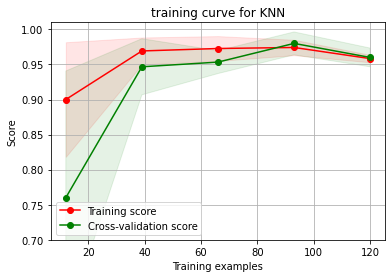

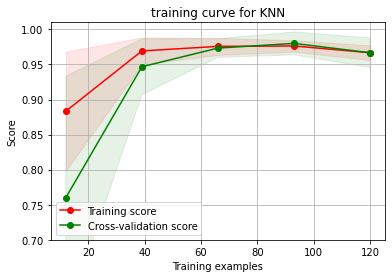

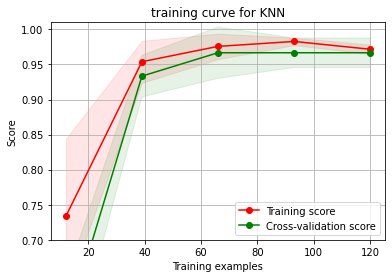

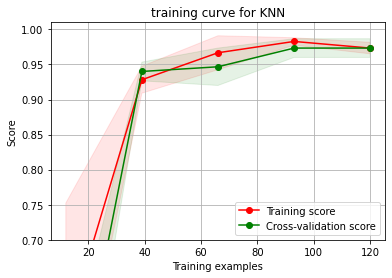

In [8]:
for i in [3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=i) 
    fig, axes = plt.subplots()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve( knn, 'training curve for KNN', X, y, axes=axes, ylim=(0.7, 1.01), cv = cv, n_jobs=4)

## 2) SVM

- Try different kernels, and record the results
- For more information, refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- finish the code
- try different parameters of "kernel"

### training and testing - Printing results

In [9]:
from sklearn.svm import SVC
for i in 'linear', 'poly', 'rbf','sigmoid':
    clf = SVC(kernel=i)
    clf.fit(X_train, y_train)
    clf_predictions = clf.predict(X_test)
    print('Precision, Recall, Confusion matrix, intraining\n,',i)
    print(metrics.classification_report(y_test, clf_predictions, digits=3))
    print(metrics.confusion_matrix(y_test, knn_predictions))

Precision, Recall, Confusion matrix, intraining
, linear
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     1.000     1.000        23
         2.0      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75

[[29  0  0]
 [ 0 23  0]
 [ 0  3 20]]
Precision, Recall, Confusion matrix, intraining
, poly
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      0.885     1.000     0.939        23
         2.0      1.000     0.870     0.930        23

    accuracy                          0.960        75
   macro avg      0.962     0.957     0.956        75
weighted avg      0.965     0.960     0.960        75

[[29  0  0]
 [ 0 23  0]
 [ 0  3 20]]
Precision, Recall, Confusion matrix, intraining
, rb

/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plotting curve for SVM

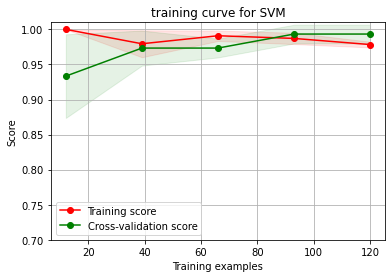

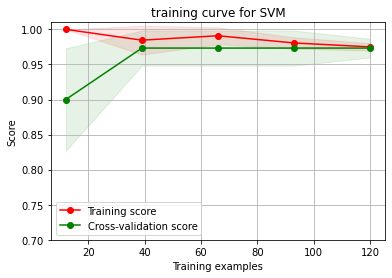

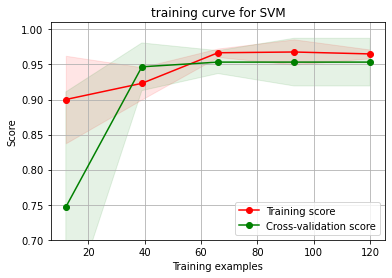

In [10]:
for i in 'linear', 'poly', 'rbf':
    clf = SVC(kernel=i)
    fig, axes = plt.subplots()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve(clf, 'training curve for SVM', X, y, axes=axes, ylim=(0.7, 1.01), cv = cv, n_jobs=4)

## 3) Logistic regression
- Try different regularization methods
- Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
- finish the code
- try different parameters of "penalty"

### training and testing - Printing results

In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
for i in 'l1','l2':
    log_reg = LogisticRegression(penalty=i, solver='liblinear')
    log_reg.fit(X_train, y_train)
    log_reg_predictions = log_reg.predict(X_test)
    print('Precision, Recall, Confusion matrix, intraining\n,',i)
    print(metrics.classification_report(y_test, log_reg_predictions, digits=3))
    print(metrics.confusion_matrix(y_test, knn_predictions))

Precision, Recall, Confusion matrix, intraining
, l1
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     0.957     0.978        23
         2.0      0.958     1.000     0.979        23

    accuracy                          0.987        75
   macro avg      0.986     0.986     0.986        75
weighted avg      0.987     0.987     0.987        75

[[29  0  0]
 [ 0 23  0]
 [ 0  3 20]]
Precision, Recall, Confusion matrix, intraining
, l2
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     0.913     0.955        23
         2.0      0.920     1.000     0.958        23

    accuracy                          0.973        75
   macro avg      0.973     0.971     0.971        75
weighted avg      0.975     0.973     0.973        75

[[29  0  0]
 [ 0 23  0]
 [ 0  3 20]]


### Plotting curve for Logistic regression


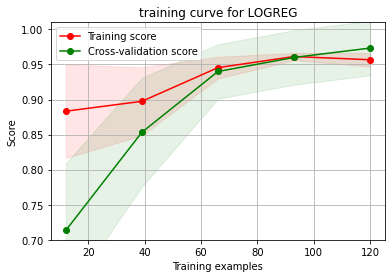

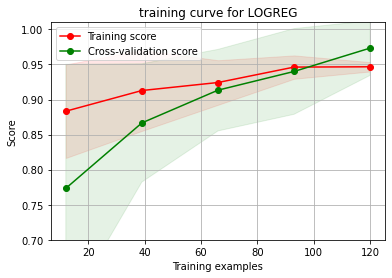

In [12]:
for i in 'l1','l2':
    log_reg = LogisticRegression(penalty=i, solver='liblinear')
    fig, axes = plt.subplots()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve(log_reg, 'training curve for LOGREG', X, y, axes=axes, ylim=(0.7, 1.01), cv = cv, n_jobs=4)

# 2. SVHN Dataset
- download data from http://ufldl.stanford.edu/housenumbers/ 
- finish the code, and record the results

In [13]:
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# loading data
train_data = sio.loadmat('train_32x32.mat')
test_data = sio.loadmat('test_32x32.mat')

# training set
length = 6000 # We use the first 5000 instances here for simplicity. But feel free to use more instances if you don't mind long training sessions.
X_train = np.zeros([length,1024])
y_train = np.zeros([length,1])
for i in range(length):
    data = np.mean(train_data['X'][:,:,:,i], axis=2) # transform data to be compatible for training 
    X_train[i] = data.flatten()
    y_train[i] = train_data['y'][i]
  
# testing set
length = 3000
X_test = np.zeros([length,1024])
y_test = np.zeros([length,1])
for i in range(length):
    data = np.mean(test_data['X'][:,:,:,i], axis=2) # transform data to be compatible for testing
    X_test[i] = data.flatten()
    y_test[i] = test_data['y'][i]


#for variables

length = 3000
X = np.zeros([length,1024])
y= np.zeros([length,1])
for i in range(length):
    datatr = np.mean(train_data['X'][:,:,:,i], axis=2)
    datate = np.mean(test_data['X'][:,:,:,i], axis=2)
    X[i] = datatr.flatten()+ datate.flatten()
    y[i] = train_data['y'][i]+test_data['y'][i]
y = y.ravel()



X.shape, y.shape




((3000, 1024), (3000,))

Checking the contents of the data

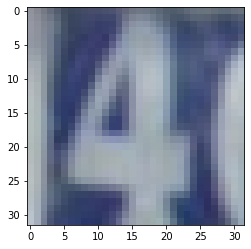

array([4.])

In [14]:
# show sample
# try to run this block multiple times
import random
image_ind = random.randint(0,5000)
plt.imshow(train_data['X'][:,:,:,image_ind])
plt.show()


y_train[image_ind]

## 1) KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier # import the package for KNN
from sklearn import metrics


for i in [3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.reshape(-1,)) # training
    y_pred = knn.predict(X_test)#testing
    print(metrics.classification_report(y_pred,y_test, digits=3))
    print(metrics.confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

         1.0       0.78      0.35      0.49      1274
         2.0       0.39      0.35      0.37       519
         3.0       0.24      0.25      0.25       322
         4.0       0.40      0.35      0.37       338
         5.0       0.19      0.31      0.24       168
         6.0       0.14      0.33      0.20        93
         7.0       0.10      0.36      0.15        61
         8.0       0.09      0.31      0.14        58
         9.0       0.11      0.30      0.16        66
        10.0       0.22      0.45      0.29       101

    accuracy                           0.34      3000
   macro avg       0.27      0.34      0.27      3000
weighted avg       0.50      0.34      0.38      3000

[[452 181 160 104  92  48 103  46  52  36]
 [ 44 183  46  31  32  25  61  26  29  42]
 [ 32  34  82  20  52  19  19  20  21  23]
 [ 33  22  17 117  20  52  10  25  15  27]
 [  8  10  17   3  52  23   4  24  14  13]
 [  2   3   3   5   9  31 

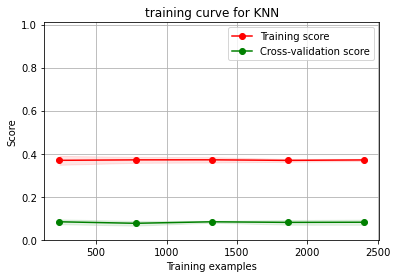

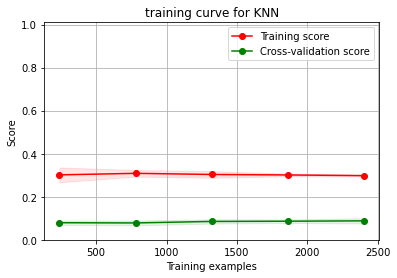

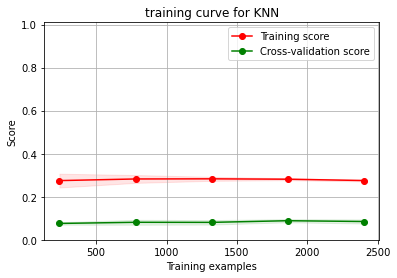

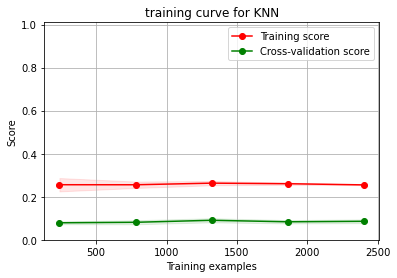

In [16]:
for i in [3,5,7,9]:
    knn = KNeighborsClassifier(n_neighbors=i) 
    fig, axes = plt.subplots()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve( knn, 'training curve for KNN', X, y, axes=axes, ylim=(0.0, 1.01), cv = cv, n_jobs=4)

## 2) SVM

In [17]:
from sklearn.svm import SVC
from sklearn import metrics
for i in 'poly','rbf','sigmoid':
    clf = SVC(kernel=i)
    clf.fit(X_train, y_train.ravel())
    y_pred = clf.predict(X_test)
    print(metrics.classification_report(y_pred, y_test, digits=3))
    print(metrics.confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

         1.0      0.864     0.533     0.660       941
         2.0      0.627     0.650     0.638       451
         3.0      0.423     0.682     0.522       214
         4.0      0.651     0.667     0.658       282
         5.0      0.539     0.559     0.549       261
         6.0      0.464     0.591     0.520       176
         7.0      0.489     0.698     0.575       159
         8.0      0.373     0.568     0.450       132
         9.0      0.468     0.454     0.461       194
        10.0      0.522     0.568     0.544       190

    accuracy                          0.587      3000
   macro avg      0.542     0.597     0.558      3000
weighted avg      0.636     0.587     0.595      3000

[[502  74  87  51  46  38  46  32  34  31]
 [ 14 293  24   9  12  13  40  12  18  16]
 [ 14  13 146   4  12   2   5   5   6   7]
 [ 13  12   7 188   9  22   3   8   6  14]
 [  4  10  29   4 146  17   7  19  10  15]
 [  7   7   8   8  17 104 

/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


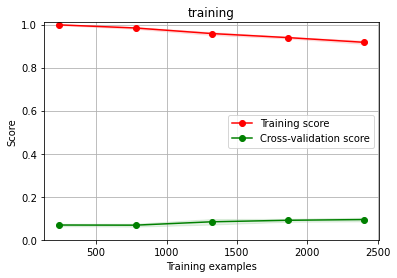

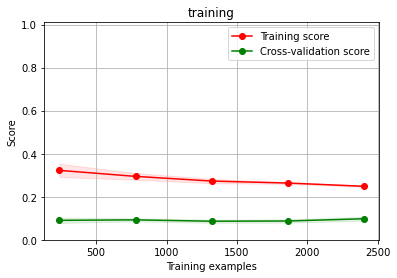

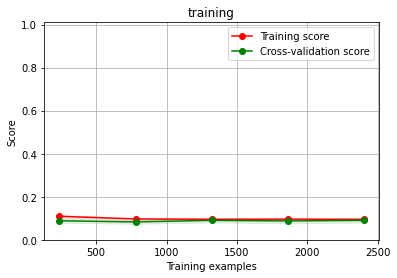

In [18]:
for i in 'poly','rbf','sigmoid':
    clf = SVC(kernel=i)
    fig, axes = plt.subplots()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve(clf, 'training', X, y, axes=axes, ylim=(0.0, 1.01), cv = cv, n_jobs=4)

## 3) Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

for i in 'l2','none':
    log_reg = LogisticRegression(penalty= i, solver= 'lbfgs')
    log_reg.fit(X_train, y_train.ravel())
    
    #predict on test
    test_preds2 = log_reg.predict(X_test)
    #accuracy on test
    print("classification", metrics.classification_report(y_test, test_preds2))
    print("confusion matirx", metrics.confusion_matrix(y_test, test_preds2))
    

/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


classification               precision    recall  f1-score   support

         1.0       0.24      0.55      0.33       581
         2.0       0.22      0.27      0.24       467
         3.0       0.18      0.10      0.13       345
         4.0       0.16      0.10      0.12       289
         5.0       0.17      0.10      0.13       271
         6.0       0.20      0.11      0.14       224
         7.0       0.11      0.05      0.07       227
         8.0       0.13      0.05      0.07       201
         9.0       0.19      0.11      0.14       188
        10.0       0.13      0.06      0.08       207

    accuracy                           0.21      3000
   macro avg       0.17      0.15      0.15      3000
weighted avg       0.18      0.21      0.18      3000

confusion matirx [[322  98  34  38  23  11  26   4  14  11]
 [187 125  28  24  16  15  29  16  14  13]
 [154  67  36  13  21   9  10  10  14  11]
 [123  55  13  30  17  12   7   5  12  15]
 [109  42  27  16  27  12   8   9  15

/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

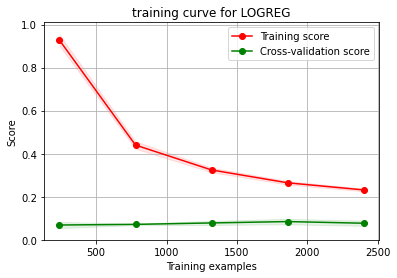

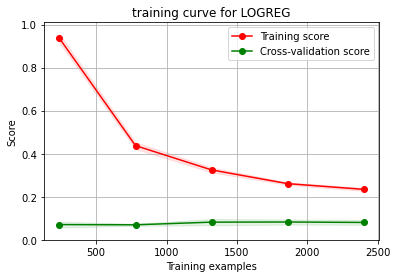

In [20]:
for i in 'l2','none':
    log_reg = LogisticRegression(penalty=i, solver='lbfgs')
    fig, axes = plt.subplots()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve(log_reg, 'training curve for LOGREG', X, y, axes=axes, ylim=(0.0, 1.01), cv = cv, n_jobs=4)